<a href="https://colab.research.google.com/github/aaryangrg/DL/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples, noise = 0.05, random_state = 42)


In [3]:
import pandas as pd
circles = pd.DataFrame({"X1" : X[:,0], "X2" : X[:,1],
                        "label" : y})
circles.head(5)

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0


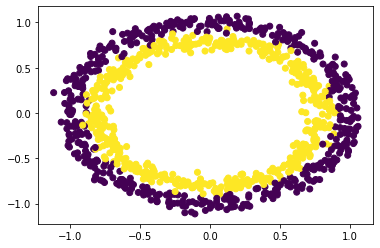

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0], y = X[:,1], c = y)

In [5]:
import torch
from sklearn.model_selection import train_test_split

#Splits tensor into train and test sets with randomization
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [6]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"


In [7]:
#Model creation
class ClassificationModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
    self.layer2 = nn.Linear(in_features = 5, out_features = 1)

  def forward(self,X):
    return self.layer2(self.layer_1(X))

model = ClassificationModel().to(device)


In [8]:
#Easier method to do the same as the model above 

model2 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

#We use this if all of our computation and layers will always be in order of their definiton


In [9]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.1)


In [10]:
#Model evaluation metrics :  Accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

In [26]:
torch.manual_seed(42)
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model.train()
  y_logits = model(X_train.type(torch.float32)).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_train.type(torch.float), y_logits)
  acc = accuracy_fn(y_train, y_pred) 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode() :
    test_logs = model(X_test.type(torch.float32)).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logs))
    test_loss = loss_fn(test_logs.type(torch.float32), y_test.type(torch.float32))
    test_accuracy = accuracy_fn(y_test, test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_accuracy:.2f}%")

Epoch: 0 | Loss: 0.72218, Accuracy: 48.62% | Test loss: 0.72606, Test acc: 55.50%
Epoch: 10 | Loss: -0.18679, Accuracy: 48.62% | Test loss: 1.27664, Test acc: 55.50%
Epoch: 20 | Loss: -2.05232, Accuracy: 48.62% | Test loss: 3.04412, Test acc: 55.50%
Epoch: 30 | Loss: -6.45951, Accuracy: 48.62% | Test loss: 7.44781, Test acc: 55.50%
Epoch: 40 | Loss: -17.46218, Accuracy: 48.62% | Test loss: 18.48727, Test acc: 55.50%
Epoch: 50 | Loss: -45.52312, Accuracy: 48.62% | Test loss: 46.68464, Test acc: 55.50%
Epoch: 60 | Loss: -117.68203, Accuracy: 48.62% | Test loss: 119.24191, Test acc: 55.50%
Epoch: 70 | Loss: -303.83261, Accuracy: 48.62% | Test loss: 306.47583, Test acc: 55.50%
Epoch: 80 | Loss: -784.64453, Accuracy: 48.62% | Test loss: 790.15466, Test acc: 55.50%
Epoch: 90 | Loss: -2027.13684, Accuracy: 48.62% | Test loss: 2040.14526, Test acc: 55.50%


In [29]:
import requests
from pathlib import Path 

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



helper_functions.py already exists, skipping download


NameError: ignored

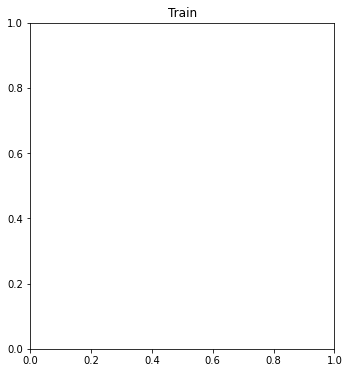

In [33]:
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [35]:
#Hyper parameter tuning - Making model deeper and wider
class CircleClassificationV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features =10, out_features = 1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleClassificationV2().to(device)
model_1

CircleClassificationV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)


In [38]:
#Increasing number of epochs
EPOCHS = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [45]:
for epoch in range(EPOCHS):
  model_1.train()
  y_logits = model_1(X_train.type(torch.float)).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_train.type(torch.float), y_logits.type(torch.float))
  acc = accuracy_fn(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test.type(torch.float)).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits.type(torch.float),
                            y_test.type(torch.float))
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.90998, Accuracy: 49.00% | Test loss: 0.68964, Test acc: 55.50%
Epoch: 100 | Loss: nan, Accuracy: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 200 | Loss: nan, Accuracy: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 300 | Loss: nan, Accuracy: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 400 | Loss: nan, Accuracy: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 500 | Loss: nan, Accuracy: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 600 | Loss: nan, Accuracy: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 700 | Loss: nan, Accuracy: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 800 | Loss: nan, Accuracy: 0.00% | Test loss: nan, Test acc: 0.00%
Epoch: 900 | Loss: nan, Accuracy: 0.00% | Test loss: nan, Test acc: 0.00%


In [46]:
#Since model is still bad, and predicts a straight line every-time we need to introduce a non-linearity in the system
# Use non-linear activation functions (other than Sigmoid)

class CircleClassificationV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 5)
    self.layer_3 = nn.Linear(in_features = 5, out_features = 1)
    self.relu = nn.ReLU()
  
  def forward(self,X):
    out1 = self.layer_1(X)
    out2 = self.layer_2(self.relu(out1))
    out3 = self.layer_3(self.relu(out2))
    return out3


In [48]:
_3 = CircleClassificationV3().to(device)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(_3.parameters(), lr=0.1)



In [51]:
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = _3(X_train.type(torch.float)).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits.type(torch.float), y_train.type(torch.float)) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    _3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = _3(X_test.type(torch.float)).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits.type(torch.float), y_test.type(torch.float))
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69501, Accuracy: 48.62% | Test Loss: 0.68567, Test Accuracy: 55.50%
Epoch: 100 | Loss: 0.68883, Accuracy: 51.38% | Test Loss: 0.69185, Test Accuracy: 44.50%
Epoch: 200 | Loss: 0.68660, Accuracy: 54.25% | Test Loss: 0.69075, Test Accuracy: 47.50%
Epoch: 300 | Loss: 0.68354, Accuracy: 60.25% | Test Loss: 0.68843, Test Accuracy: 50.00%
Epoch: 400 | Loss: 0.67852, Accuracy: 63.62% | Test Loss: 0.68448, Test Accuracy: 55.50%
Epoch: 500 | Loss: 0.67097, Accuracy: 67.62% | Test Loss: 0.67859, Test Accuracy: 60.00%
Epoch: 600 | Loss: 0.65766, Accuracy: 70.50% | Test Loss: 0.66826, Test Accuracy: 62.00%
Epoch: 700 | Loss: 0.63534, Accuracy: 76.38% | Test Loss: 0.65017, Test Accuracy: 69.00%
Epoch: 800 | Loss: 0.59735, Accuracy: 81.00% | Test Loss: 0.61976, Test Accuracy: 73.00%
Epoch: 900 | Loss: 0.53600, Accuracy: 84.62% | Test Loss: 0.56977, Test Accuracy: 77.50%
